# Learning a CStree

In [1]:
import numpy as np
import networkx as nx

import cstrees.cstree as ct
import cstrees.stage as st
import cstrees.learning as ctl

%load_ext autoreload
%autoreload 2

## Create the true CStree

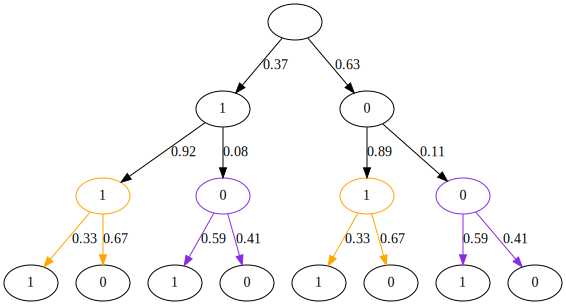

In [2]:
np.random.seed(5)
tree = ct.CStree([2] * 3, labels=["a", "b", "c"])

tree.update_stages({
    0: [st.Stage([0]), st.Stage([1])],
    1: [st.Stage([{0, 1}, 0]), st.Stage([{0, 1}, 1])]})

tree.sample_stage_parameters(alpha=1.0)
tree.plot()


context:  None


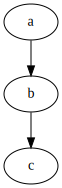

In [3]:
true_cdags = tree.to_minimal_context_graphs()
for key, val in true_cdags.items():
    print("context: ", key)
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_true.png",
                args='-Glabel="'+str(key)+'"   ')
agraph


## Draw a lot of samples

In [4]:
df = tree.sample(2000)
df

,a,b,c
0,2,2,2
1,1,1,1
2,0,0,1
3,1,1,0
4,0,1,0
...,...,...,...
1996,1,1,0
1997,0,1,1
1998,1,1,1
1999,1,1,0


## Find the optimal order by exhustive search

In [5]:
optord, score = ctl._find_optimal_order(df, strategy="max", max_cvars=1, 
                                       alpha_tot=1.0, method="BDeu")
print("optimal order: {}, score {}".format(optord, score))


order: ['a', 'b', 'c'], score: -3266.7673757353805
order: ['a', 'c', 'b'], score: -3268.9944009209453
order: ['b', 'a', 'c'], score: -3266.7673757353796
order: ['b', 'c', 'a'], score: -3266.7673757353796
order: ['c', 'a', 'b'], score: -3268.9944009209453
order: ['c', 'b', 'a'], score: -3266.7673757353805
optimal order: ['b', 'a', 'c'], score -3266.7673757353796


## Find the optimal CStree (staging of each level) of the best order

In [6]:
opttree = ctl._optimal_cstree_given_order(optord, df, max_cvars=1,
                             alpha_tot=1.0, method="BDeu")
print("Optimal CStree stagings per level:")
for key, val in opttree.stages.items():
    if key == -1: continue
    print("level {}:".format(key))
    for val2 in val:
        print(val2)

Optimal CStree stagings per level:
level 0:
[0]
[1]
level 1:
[0, {0, 1}]
[1, {0, 1}]
level 2:


## Estimate the parameters

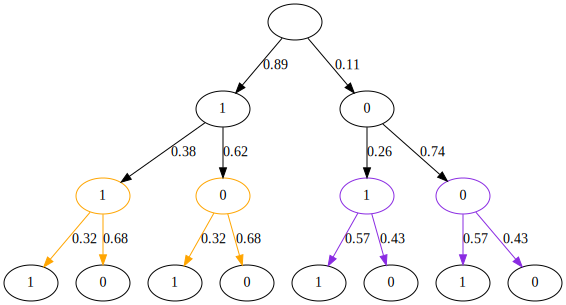

In [7]:
opttree.estimate_stage_parameters(df, alpha_tot=1.0, method="BDeu")
opttree.plot()


## Plot the minimal context DAGs

Context: None


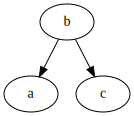

In [8]:
opt_cdags = opttree.to_minimal_context_graphs()
for key, val in opt_cdags.items():
    print("Context: {}".format(key))
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
agraph
